In [17]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [18]:
!kaggle datasets download -d zzettrkalpakbal/full-filled-brain-stroke-dataset

  0% 0.00/52.1k [00:00<?, ?B/s]
100% 52.1k/52.1k [00:00<00:00, 74.9MB/s]


In [19]:
!unzip \*.zip && rm *.zip

Archive:  full-filled-brain-stroke-dataset.zip
  inflating: full_data.csv           
  inflating: full_filled_stroke_data (1).csv  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("full_data.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Data Cleaning

In [24]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [25]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [26]:
df.shape

(4981, 11)

In [27]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [28]:
df['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

Visualizations

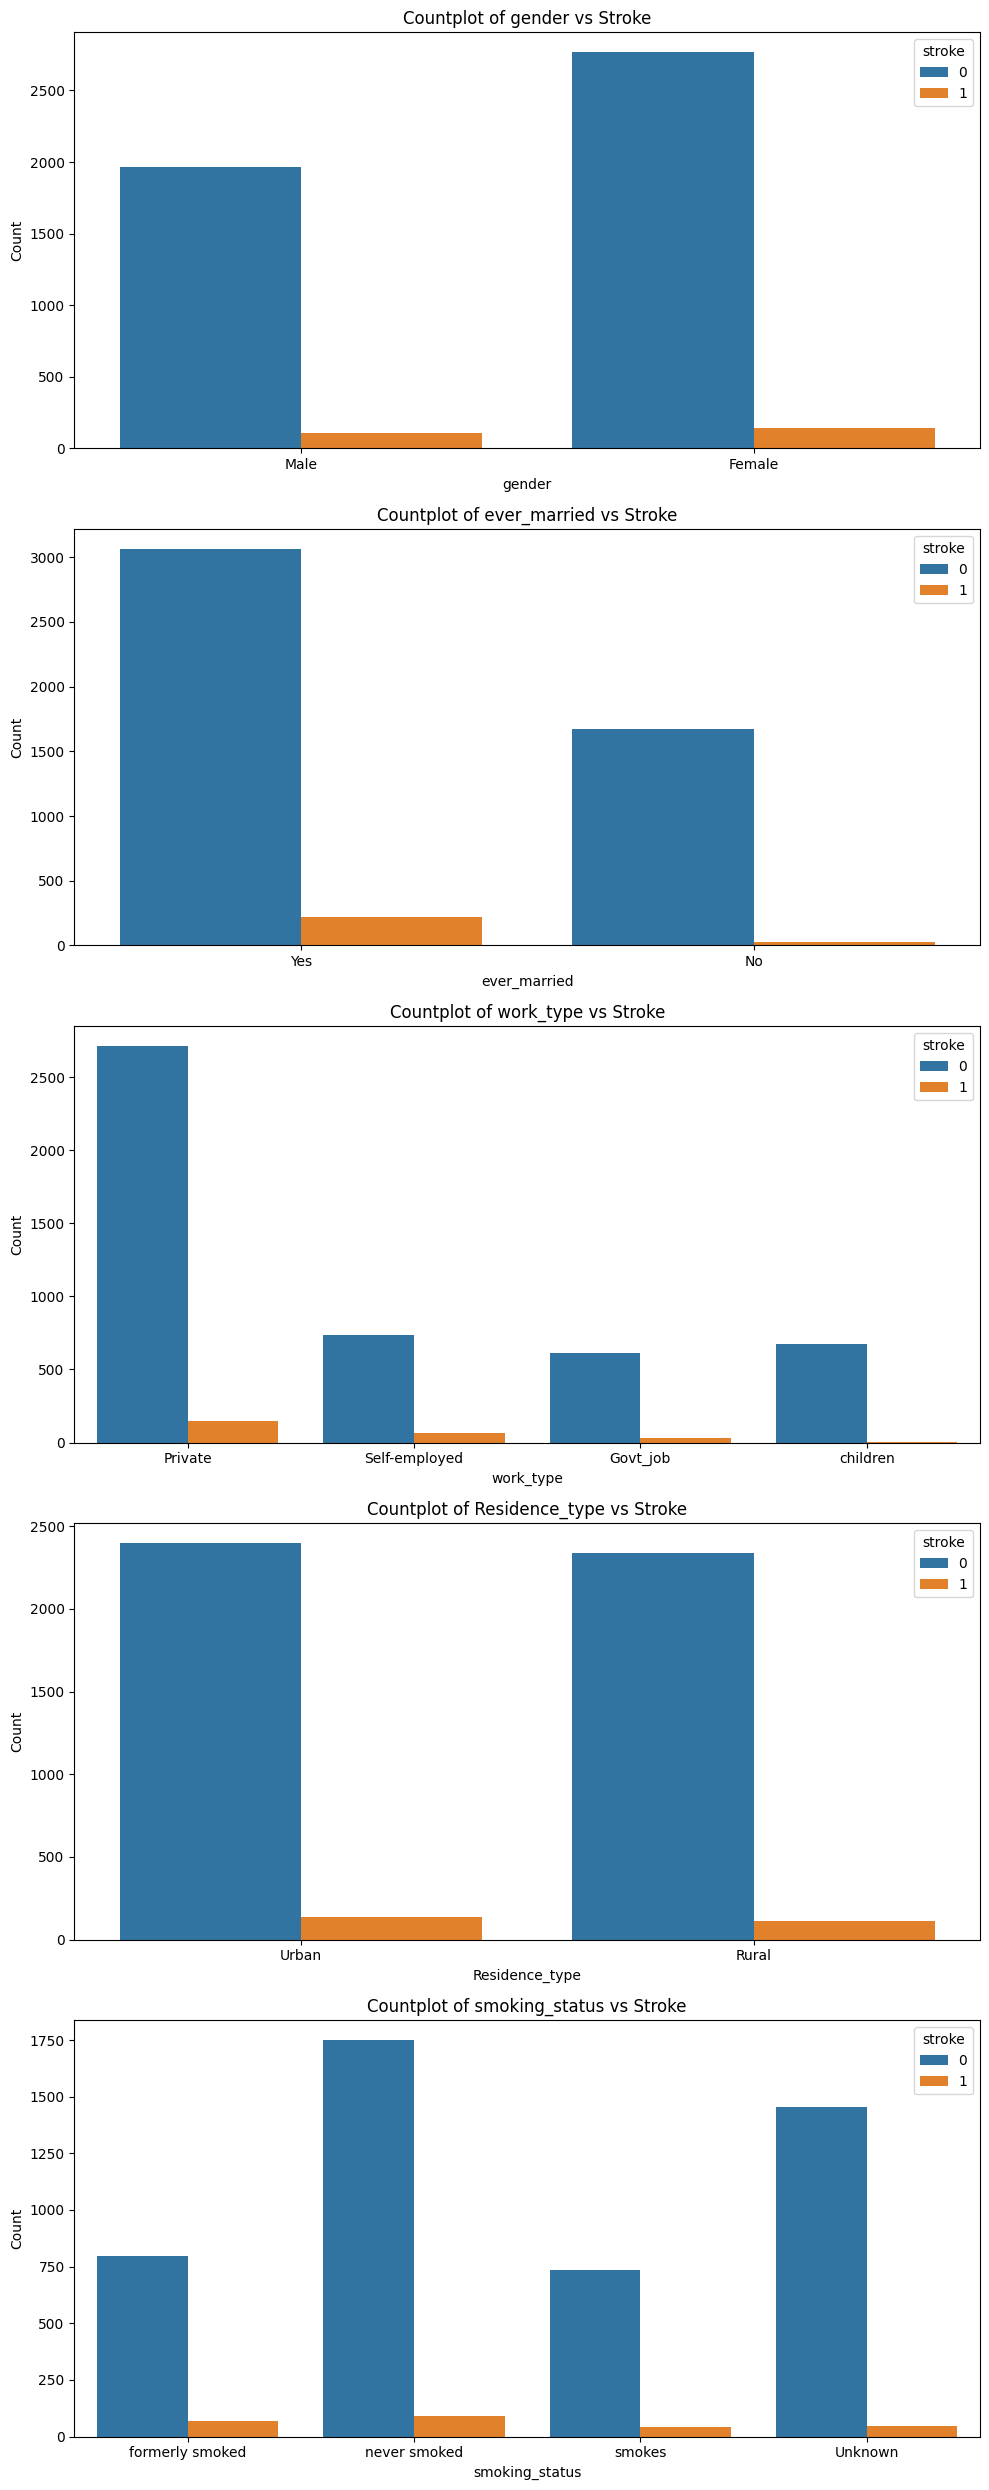

In [29]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))

# Plot count plots for each categorical column
for col, ax in zip(categorical_columns, axes):
    sns.countplot(x=col, hue='stroke', data=df,ax=ax)
    ax.set_title(f'Countplot of {col} vs Stroke')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

<ipython-input-30-407fc1d37529>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


<Axes: >

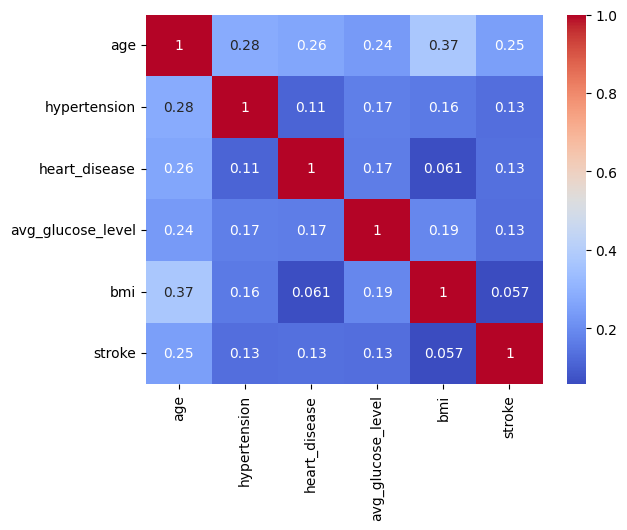

In [30]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<Axes: xlabel='stroke', ylabel='count'>

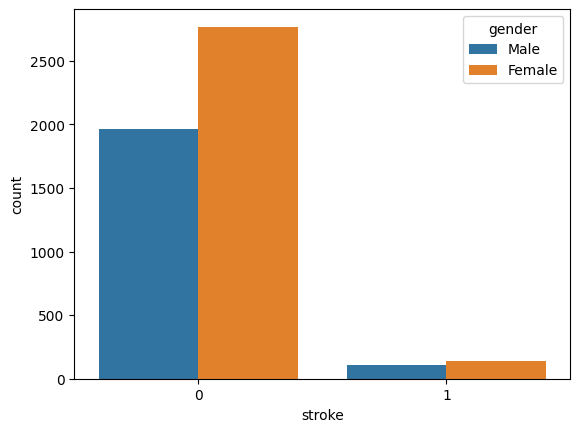

In [31]:
sns.countplot(x = 'stroke',hue='gender',data=df)

<Axes: xlabel='gender', ylabel='avg_glucose_level'>

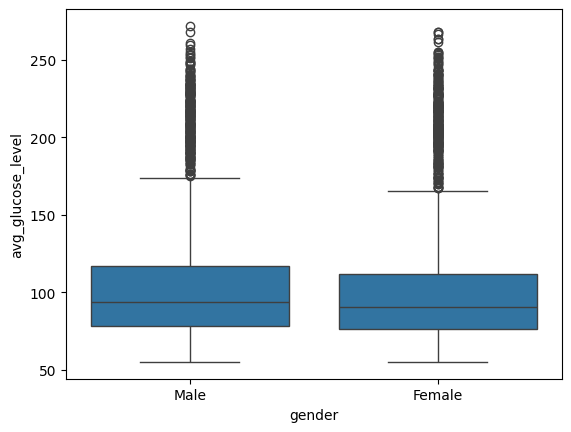

In [32]:
sns.boxplot(data = df,x='gender',y='avg_glucose_level')

<Axes: xlabel='stroke', ylabel='bmi'>

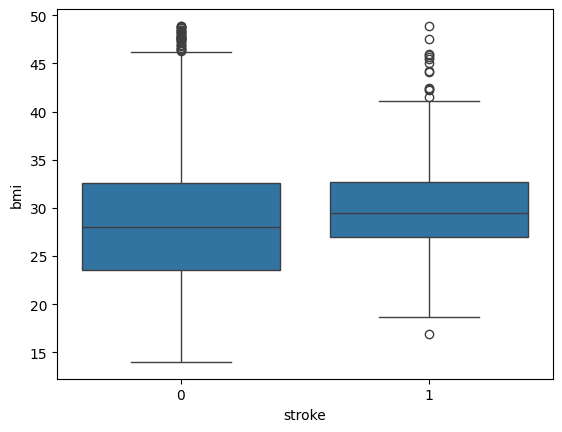

In [33]:
sns.boxplot(y='bmi',x='stroke',data=df)

<Axes: xlabel='stroke', ylabel='age'>

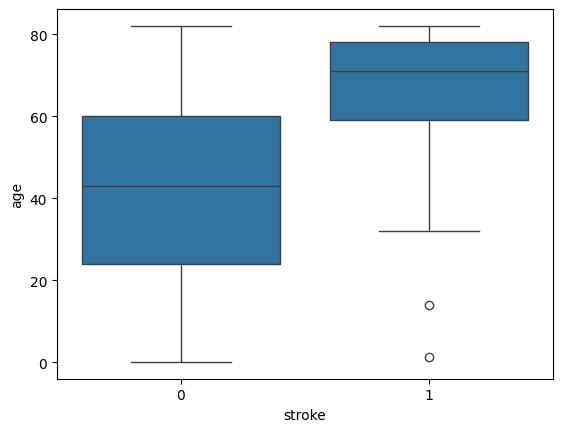

In [34]:
sns.boxplot(data = df,x='stroke',y='age')